# Brain EEG Consumer Behaviour Analysis

I have performed analysis on EEG brain signals, classify the people response into three different categories. The dataset was gathered from two individuals (1 male, 1 female) over the course of three minutes for each of the three possible reaction states: positive, neutral, and negative. We used an EEG headband that record the EEG signals TP9, AF7, AF8, and TP10 via dry electrodes. They observed the subjects’ reactions by showing them variety of movie scenes, including emotional, funny, sad, death and nature etc. In this analysis combines “Positive” and “Neutral” responses that indicates people “Like” the movie, while their “Negative” responses indicate they “Dislike” the film. It was simplified to a binary classification by combining labels into Neutral, Positive, and Negative reactions categories [x]. 

The dataset of EEG brainwave data has been processed, extract the features consists of brain signals, try to predict the emotional state of a subject. The EEG dataset contains 2132 rows and 2549 columns. Length of each emotion signal is 750. 


In [2]:
# Import Libraries

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import tensorflow 
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import SGD

from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import LSTM
tf.keras.backend.clear_session()
from sklearn.metrics import plot_confusion_matrix
from sklearn import datasets, tree, linear_model, svm
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import confusion_matrix,classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix

import seaborn as sns
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

'''This is a dataset of EEG brainwave data that has been processed with original strategy of statistical extraction 
    the data set consist brain signal of one male and one feamle by showing them different scenes (like Emotional,Funny,Death,Nature scenes) 
    and took their brain signal in these particular environments'''

In [2]:
#Reading dataset

In [3]:
data = pd.read_csv("emotions.csv")

In [4]:
data

,# mean_0_a,mean_1_a,mean_2_a,mean_3_a,mean_4_a,mean_d_0_a,mean_d_1_a,mean_d_2_a,mean_d_3_a,mean_d_4_a,...,fft_741_b,fft_742_b,fft_743_b,fft_744_b,fft_745_b,fft_746_b,fft_747_b,fft_748_b,fft_749_b,label
0,4.620,30.3,-356.0,15.60,26.3,1.070,0.411,-15.700,2.060,3.15,...,23.50,20.300,20.300,23.50,-215.0,280.00,-162.00,-162.00,280.00,NEGATIVE
1,28.800,33.1,32.0,25.80,22.8,6.550,1.680,2.880,3.830,-4.82,...,-23.30,-21.800,-21.800,-23.30,182.0,2.57,-31.60,-31.60,2.57,NEUTRAL
2,8.900,29.4,-416.0,16.70,23.7,79.900,3.360,90.200,89.900,2.03,...,462.00,-233.000,-233.000,462.00,-267.0,281.00,-148.00,-148.00,281.00,POSITIVE
3,14.900,31.6,-143.0,19.80,24.3,-0.584,-0.284,8.820,2.300,-1.97,...,299.00,-243.000,-243.000,299.00,132.0,-12.40,9.53,9.53,-12.40,POSITIVE
4,28.300,31.3,45.2,27.30,24.5,34.800,-5.790,3.060,41.400,5.52,...,12.00,38.100,38.100,12.00,119.0,-17.60,23.90,23.90,-17.60,NEUTRAL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2127,32.400,32.2,32.2,30.80,23.4,1.640,-2.030,0.647,-0.121,-1.10,...,-21.70,0.218,0.218,-21.70,95.2,-19.90,47.20,47.20,-19.90,NEUTRAL
2128,16.300,31.3,-284.0,14.30,23.9,4.200,1.090,4.460,4.720,6.63,...,594.00,-324.000,-324.000,594.00,-35.5,142.00,-59.80,-59.80,142.00,POSITIVE
2129,-0.547,28.3,-259.0,15.80,26.7,9.080,6.900,12.700,2.030,4.64,...,370.00,-160.000,-160.000,370.00,408.0,-169.00,-10.50,-10.50,-169.00,NEGATIVE
2130,16.800,19.9,-288.0,8.34,26.0,2.460,1.580,-16.000,1.690,4.74,...,124.00,-27.600,-27.600,124.00,-656.0,552.00,-271.00,-271.00,552.00,NEGATIVE


In [32]:
#chceking length of dataset
len(data)

2132

In [33]:
data.shape

(2132, 2549)

In [34]:
#Seprarting Positive,Neagtive and Neutral dataframes for plotting
pos = data.loc[data["label"]=="POSITIVE"]
sample_pos = pos.loc[2, 'fft_0_b':'fft_749_b']
neg = data.loc[data["label"]=="NEGATIVE"]
sample_neg = neg.loc[0, 'fft_0_b':'fft_749_b']
neu = data.loc[data["label"]=="NEUTRAL"]
sample_neu = neu.loc[1, 'fft_0_b':'fft_749_b']

In [35]:
sample_pos

fft_0_b      -85.9
fft_1_b      361.0
fft_2_b      -62.2
fft_3_b      -62.2
fft_4_b      361.0
             ...  
fft_745_b   -267.0
fft_746_b    281.0
fft_747_b   -148.0
fft_748_b   -148.0
fft_749_b    281.0
Name: 2, Length: 750, dtype: object

In [36]:
sample_neg

fft_0_b     -508.0
fft_1_b      438.0
fft_2_b     -222.0
fft_3_b     -222.0
fft_4_b      438.0
             ...  
fft_745_b   -215.0
fft_746_b    280.0
fft_747_b   -162.0
fft_748_b   -162.0
fft_749_b    280.0
Name: 0, Length: 750, dtype: object

In [37]:
sample_neu

fft_0_b      126.0
fft_1_b       -4.0
fft_2_b       7.42
fft_3_b       7.42
fft_4_b       -4.0
             ...  
fft_745_b    182.0
fft_746_b     2.57
fft_747_b    -31.6
fft_748_b    -31.6
fft_749_b     2.57
Name: 1, Length: 750, dtype: object

In [38]:
print(len(sample_pos))
print(len(sample_neg))
print(len(sample_neu))

750
750
750


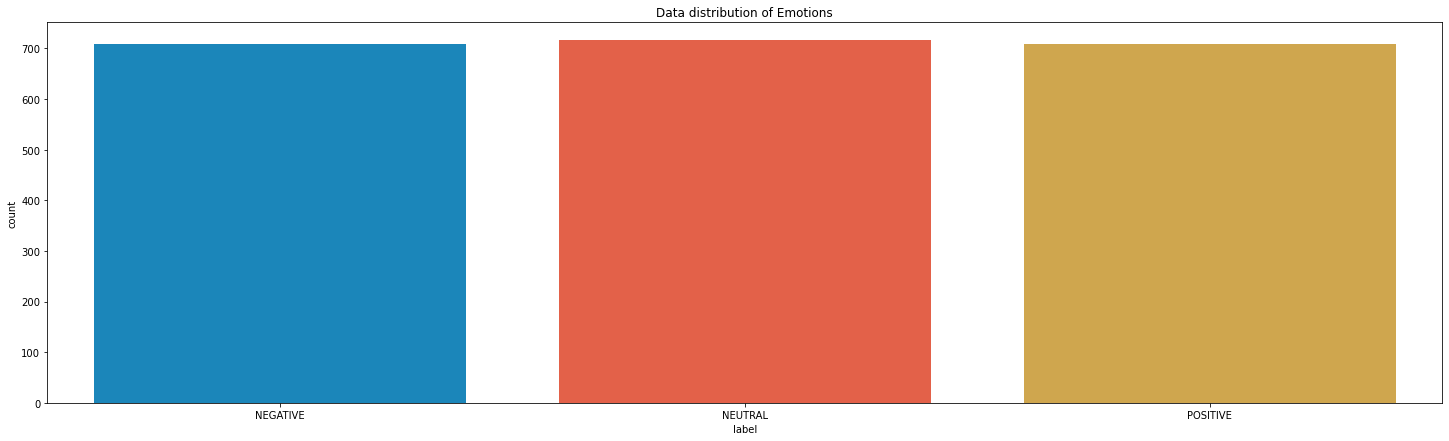

In [7]:
#plottintg Dataframe distribution
plt.figure(figsize=(25,7))
plt.title("Data distribution of Emotions")
plt.style.use('fivethirtyeight')
sns.countplot(x='label', data=data)
plt.show()

'''As we can noticed the most of the Negative Signals are from greater than 600 to and less than than -600'''

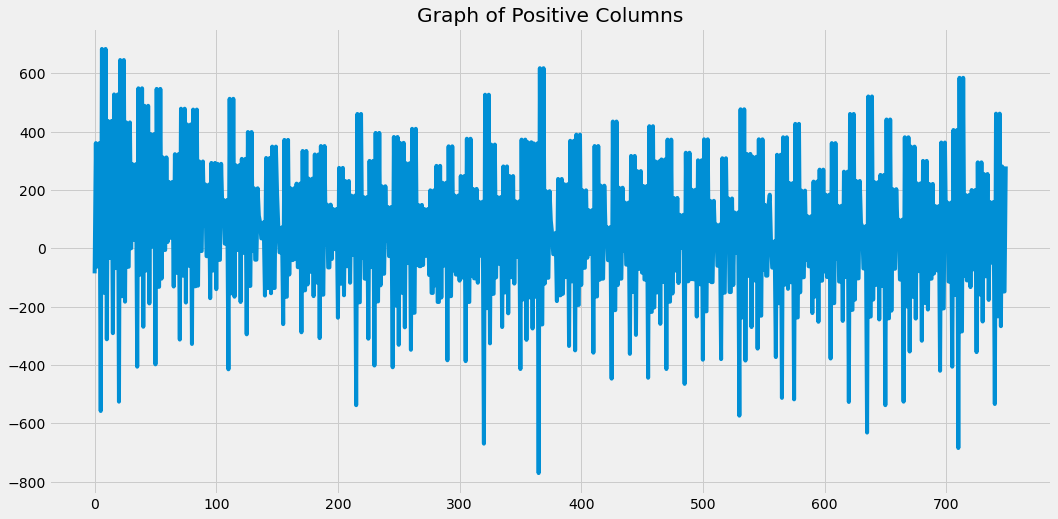

In [42]:
#Plotting Positive DataFrame
plt.figure(figsize=(16, 8))
plt.plot(range(len(sample_pos)), sample_pos)
plt.title("Graph of Positive Columns")
plt.show()


'''As we can noticed the most of the Negative Signals are from less than 600 to and greater than -600'''

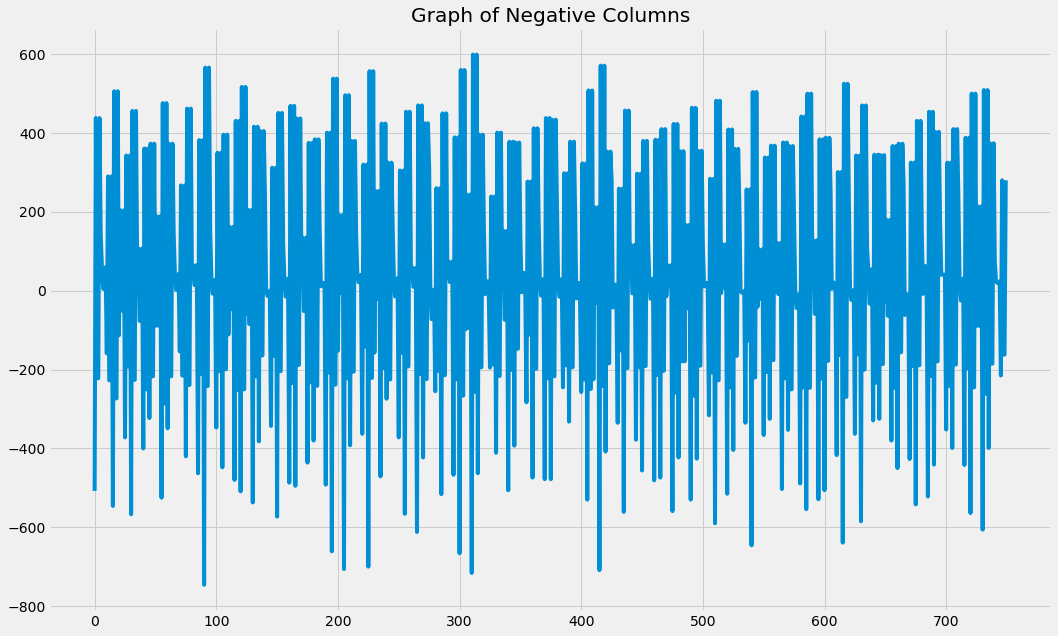

In [14]:
#Plotting Negative DataFrame
plt.figure(figsize=(16, 10))
plt.plot(range(len(sample_neg)), sample_neg)
plt.title("Graph of Negative Columns")
plt.show()


'''As we can see the most of the Neutral Signals ae in between -50 to 250 '''

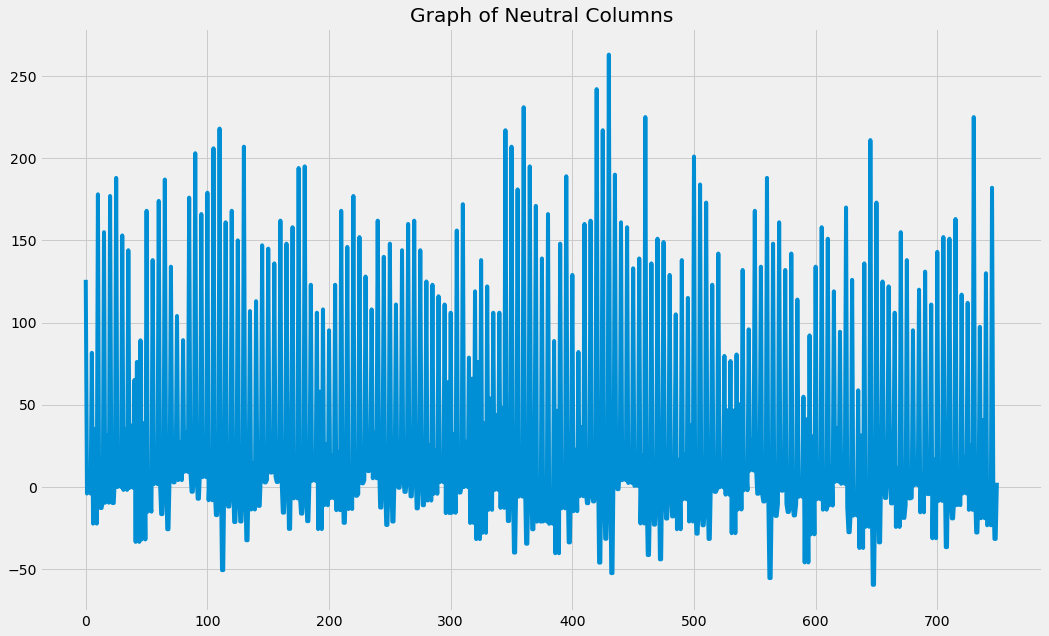

In [17]:
#Plotting Neutral DataFrame
plt.figure(figsize=(16, 10))
plt.plot(range(len(sample_neu)), sample_neu)
plt.title("Graph of Neutral Columns")
plt.show()


## Data Transformation - One Hot Encoding

Transform the data set, encode the labels into numbers. Get the brain signals into x variable and labels into y variable. Sklearn standard scaler function is applied on to the x variable. It useful for the feature that follow a normal distribution. It standardizes feature by subtracting the mean and then scaling to unit variance. One hot encoding is applied on labels. Split the training set and test data set with 80% and 20% respectively. 

In [19]:
def Transform_data(data):
    #Encoding Lables into numbers
    encoding_data = ({'NEUTRAL': 0, 'POSITIVE': 1, 'NEGATIVE': 2} )
    data_encoded = data.replace(encoding_data)
    #getting brain signals into x variable
    x=data_encoded.drop(["label"]  ,axis=1)
    #getting labels into y variable
    y = data_encoded.loc[:,'label'].values
    scaler = StandardScaler()
    #scaling Brain Signals
    scaler.fit(x)
    X = scaler.transform(x)
    #One hot encoding Labels 
    Y = to_categorical(y)
    return X,Y

In [20]:
#Calling above function and splitting dataset into train and test
X,Y = Transform_data(data)
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 4)

In [24]:
len(x_train)

1705

In [25]:
len(x_test)

427

In [21]:
x_train.shape[0]

1705

In [22]:
#checking shape of dataset
x_train.shape[1]

2548

# Build Model

Initialize the LSTM_MODEL. Input layer is added used Input shape of dataset which is according to number of columns. Hidden layer of brain signal is added to get the optimum solutions, expand the dimension, insert the input layer at index 2. Gated Recurrent units (GRU) layer was also used with 256 filters and set return sequence true. Flatten GRU layer to convert dataset into vector 1dimmensional array. Classify the output dense layer with 3 neurons, activation function SoftMax is used. Print the model summary. Compile the model using Adam optimizer, whose metrics are accuracy and loss function was set to categorical cross entropy. 

In [26]:
def create_model():
    #input layer of model for brain signals
    inputs = tf.keras.Input(shape=(x_train.shape[1],))
    #Hidden Layer for Brain signal using LSTM(GRU)
    expand_dims = tf.expand_dims(inputs, axis=2)

    gru = tf.keras.layers.GRU(256, return_sequences=True)(expand_dims)
    #Flatten Gru layer into vector form (one Dimensional array)
    flatten = tf.keras.layers.Flatten()(gru)
    #output latyer of Model
    outputs = tf.keras.layers.Dense(3, activation='softmax')(flatten)


    model = tf.keras.Model(inputs=inputs, outputs=outputs)
    print(model.summary())
    return model

In [27]:
#cretaing model
lstmmodel = create_model()
#Compiling model 
lstmmodel.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

NotImplementedError: Cannot convert a symbolic Tensor (gru/strided_slice:0) to a numpy array. This error may indicate that you're trying to pass a Tensor to a NumPy call, which is not supported

In [14]:
#Training and Evaluting model
history = lstmmodel.fit(x_train, y_train, epochs = 10, validation_split=0.1)
loss, acc = lstmmodel.evaluate(x_test, y_test)

Epoch 1/10


2022-08-17 14:19:18.788837: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


48/48 [==============================] - 193s 4s/step - loss: 0.7140 - accuracy: 0.8709 - val_loss: 0.2988 - val_accuracy: 0.9123
Epoch 2/10
48/48 [==============================] - 188s 4s/step - loss: 0.1832 - accuracy: 0.9348 - val_loss: 0.2706 - val_accuracy: 0.9298
Epoch 3/10
48/48 [==============================] - 189s 4s/step - loss: 0.1585 - accuracy: 0.9478 - val_loss: 0.1288 - val_accuracy: 0.9591
Epoch 4/10
48/48 [==============================] - 189s 4s/step - loss: 0.0606 - accuracy: 0.9733 - val_loss: 0.1243 - val_accuracy: 0.9298
Epoch 5/10
48/48 [==============================] - 187s 4s/step - loss: 0.0390 - accuracy: 0.9902 - val_loss: 0.0885 - val_accuracy: 0.9708
Epoch 6/10
48/48 [==============================] - 188s 4s/step - loss: 0.0299 - accuracy: 0.9948 - val_loss: 0.1440 - val_accuracy: 0.9474
Epoch 7/10
48/48 [==============================] - 190s 4s/step - loss: 0.0330 - accuracy: 0.9857 - val_loss: 0.1779 - val_accuracy: 0.9415
Epoch 8/10
48/48 [======

Starts the model training on dataset, total number of epochs is 10, validation split to 0.1 and steps per epochs is 48. After training the model, evaluate the model accuracy through testing data set. Accuracy achieved of overall model accuracy is 96% and loss was 11%. 

In [15]:
#Loss and Accuracy of model on Testiong Dataset 
print(f"Loss on testing: {loss*100}",f"\nAccuracy on Training: {acc*100}")

Loss on testing: 10.964921116828918 
Accuracy on Training: 95.78454494476318


In [16]:
#predicting model on test set for plotting Confusion Matrix
pred  = lstmmodel.predict(x_test)

In [17]:
#Creation of Function of Confusion Matrix
def plot_confusion_matrix(cm, names, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(data.label.unique()))
    plt.xticks(tick_marks, names, rotation=90)
    plt.yticks(tick_marks, names)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [18]:
#after getting prediction checking maximum score prediction to claim which emotion this brain signal belongs to
pred1 = np.argmax(pred,axis=1)

In [19]:
#inversing the one hot encoding
y_test1 =   np.argmax(y_test,axis=1)

In [20]:
#printing first 10 Actual and predicted outputs of Test brain signals 
print("Predicted:  ",pred1[:10])
print("\n")
print("Actual: ",y_test1[:10])


Predicted:   [1 1 1 2 1 1 2 1 2 1]


Actual:  [1 1 1 2 1 1 2 1 2 1]


Plot the confusion matrix using LSTM model predicted on the test dataset. Predicted labels on the x-axis and actual labels on the y-axis. The figure below shows the confusion matrix of LSTM model. Total test set was 427, model predict 150 brain signals neutral emotion and 3 positives in the first row, In the second row 3 neutral, 129 positive and 10 negative emotions, and in the third-row model predicts 2 positive and 130 negative emotions respectively. 

Confusion matrix, without normalization
[[150   3   0]
 [  3 129  10]
 [  0   2 130]]


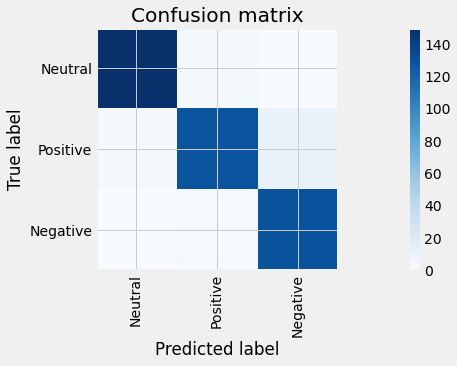

In [21]:
#Plotting Confusion matrix of Lstm Model
cm = confusion_matrix(y_test1, pred1)
np.set_printoptions(precision=2)
print('Confusion matrix, without normalization')
print(cm)
plt.rcParams["figure.figsize"]=(20,5)
plt.figure()
plot_confusion_matrix(cm,["Neutral","Positive","Negative"])

I used other machine learning and deep learning model for training and then compared their results with LSTM model through printing the classification reports and plotting confusion matrix of each model. I train the feature set on Gaussian naïve bayes (GNB), support vector classifier (SVC), Logistic regression model, decision tree classifier and used random forest model to classify emotions from EEG brain signals. The accuracy achieved of GNB, SVC, Decision tree, Logistic Regression and Random Forest is 65%, 96%, 97%, 95% and 95% respectively. 

In [22]:
names1 = ["Neutral","Positive","Negative"]


*		Classification Report GNB:
               precision    recall  f1-score   support

           0       0.65      0.97      0.78       153
           1       0.46      0.30      0.36       142
           2       0.81      0.66      0.73       132

    accuracy                           0.65       427
   macro avg       0.64      0.64      0.62       427
weighted avg       0.64      0.65      0.62       427


*		Classification Report SVM:
               precision    recall  f1-score   support

           0       0.95      0.99      0.97       153
           1       0.98      0.89      0.94       142
           2       0.94      0.99      0.97       132

    accuracy                           0.96       427
   macro avg       0.96      0.96      0.96       427
weighted avg       0.96      0.96      0.96       427


*		Classification Report LR:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98       153
           1       0.99      0.93 

/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMa

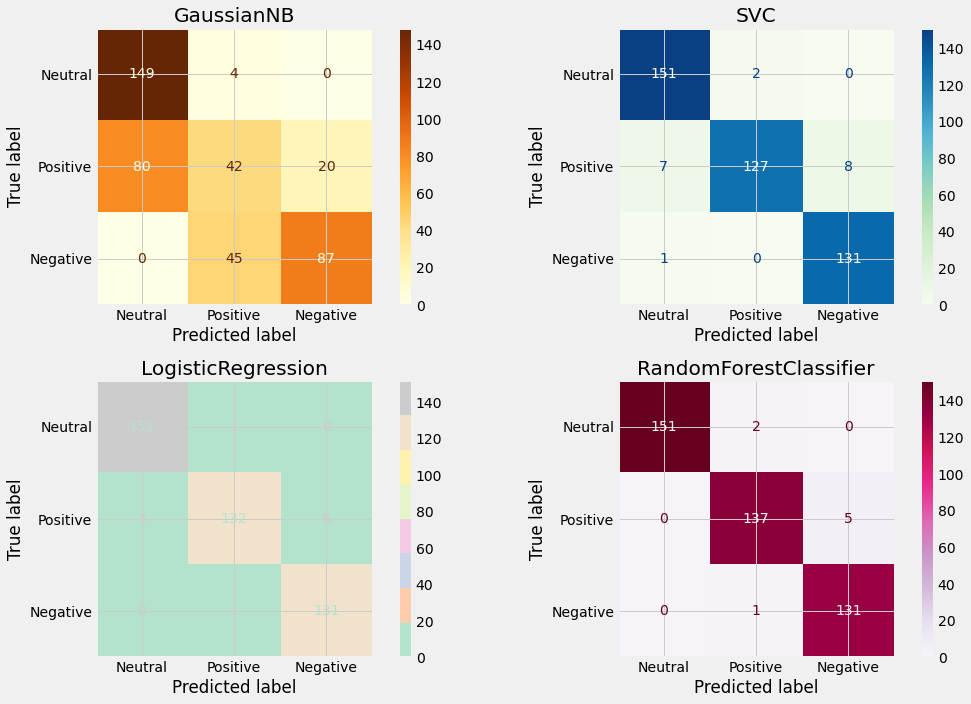

In [23]:
#Training our dataset on different Classifiers to check the results and creating their classification reports
#NAves Bayes Clssifier
Classifier_gnb = GaussianNB().fit(x_train, np.argmax(y_train,axis=1))
pred_gnb = Classifier_gnb.predict(x_test)
print ('\n*\t\tClassification Report GNB:\n', classification_report(np.argmax(y_test,axis=1), pred_gnb))
confusion_matrix_graph = confusion_matrix(np.argmax(y_test,axis=1), pred_gnb)
### Support Vector Machine

Classifier_svm = svm.SVC(kernel='linear').fit(x_train, np.argmax(y_train,axis=1))
pred_svm = Classifier_svm.predict(x_test)
print ('\n*\t\tClassification Report SVM:\n', classification_report(np.argmax(y_test,axis=1), pred_svm))
confusion_matrix_graph = confusion_matrix(np.argmax(y_test,axis=1), pred_svm)
### Logistic Regression

Classifier_LR = linear_model.LogisticRegression(solver = 'liblinear', C = 75).fit(x_train, np.argmax(y_train,axis=1))
pred_LR = Classifier_LR.predict(x_test)
print ('\n*\t\tClassification Report LR:\n', classification_report(np.argmax(y_test,axis=1), pred_LR))
confusion_matrix_graph = confusion_matrix(np.argmax(y_test,axis=1), pred_LR)
### Decision Tree Regressor

Classifier_dt = tree.DecisionTreeClassifier().fit(x_train, np.argmax(y_train,axis=1))
pred_dt = Classifier_dt.predict(x_test)
print ('\n*\t\tClassification Report Deccsion Tree:\n', classification_report(np.argmax(y_test,axis=1), pred_dt))
confusion_matrix_graph = confusion_matrix(np.argmax(y_test,axis=1), pred_dt)
### Random Forest

Classifier_forest = RandomForestClassifier(n_estimators = 50, random_state = 0).fit(x_train,np.argmax(y_train,axis=1))
pred_fr = Classifier_dt.predict(x_test)


print ('\n*\t\tClassification Report Random Forest:\n', classification_report(np.argmax(y_test,axis=1), pred_fr))
confusion_matrix_graph = confusion_matrix(np.argmax(y_test,axis=1), pred_fr)
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15,10))
classifiers = [GaussianNB(),svm.SVC(kernel='linear'),
               linear_model.LogisticRegression(solver = 'liblinear', C = 75),
               RandomForestClassifier(n_estimators = 50, random_state = 0)]
from sklearn.metrics import plot_confusion_matrix
for cls in classifiers:
    cls.fit(x_train,np.argmax(y_train,axis=1))
    
colors = [ 'YlOrBr', 'GnBu', 'Pastel2', 'PuRd']
for cls, ax,c in zip(classifiers, axes.flatten(),colors):
    plot_confusion_matrix(cls, 
                          x_test, 
                          np.argmax(y_test,axis=1), 
                          ax=ax, 
                          cmap=c,
                         display_labels= names1)
    ax.title.set_text(type(cls).__name__)
plt.tight_layout()  
plt.show()


In [24]:
#Classification Report of Lstm model
print('\n*\t\tClassification Report OF Brain Waves LSTM:\n', classification_report(np.argmax(y_test,axis=1), np.argmax(lstmmodel.predict(x_test),axis=1) ))


*		Classification Report OF Brain Waves LSTM:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98       153
           1       0.96      0.91      0.93       142
           2       0.93      0.98      0.96       132

    accuracy                           0.96       427
   macro avg       0.96      0.96      0.96       427
weighted avg       0.96      0.96      0.96       427



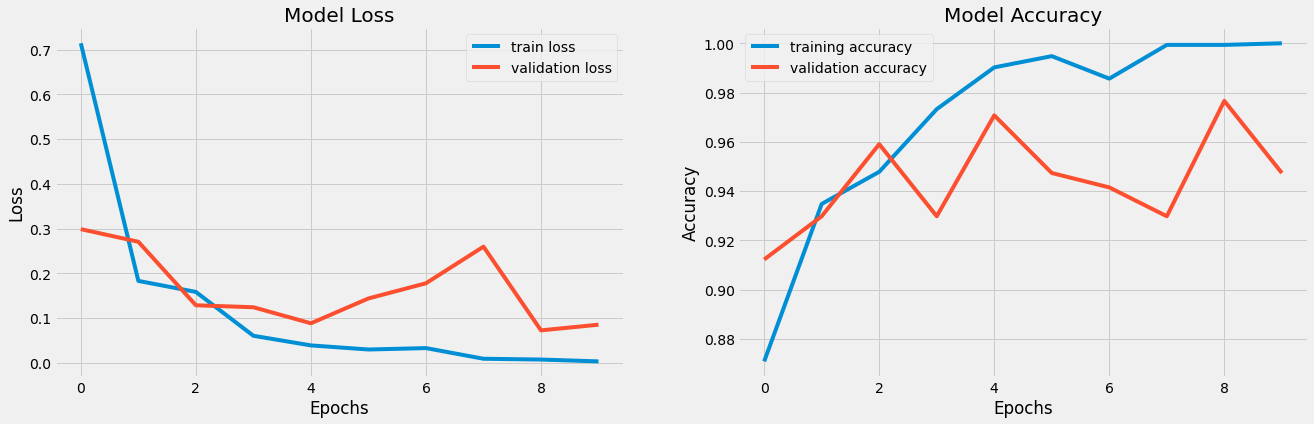

In [25]:
#Plotting Graph of Lstm model Training, Loss and Accuracy
plt.style.use("fivethirtyeight")
plt.figure(figsize = (20,6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Model Loss",fontsize=20)
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train loss', 'validation loss'], loc ='best')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Model Accuracy",fontsize=20)
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['training accuracy', 'validation accuracy'], loc ='best')
plt.show()